# EDA and Pre-Processing

## Initial EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('cleaned_lyrics_gender.csv')
df.head()

,artist,seq,GENDER,IS_BAND
0,Elizabeth Naccarato,"Oh, Danny boy, the pipes, the pipes are callin...",female,False
1,Ella Fitzgerald,I never feel a thing is real\r\nWhen I'm away ...,female,False
2,Ella Fitzgerald,"I really can't stay\r\nBut, baby, it's cold ou...",female,False
3,Ella Fitzgerald,All my life\r\nI've been waiting for you\r\nMy...,female,False
4,Ella Fitzgerald,I'll be down to get you in a taxi honey\r\nBet...,female,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21057 entries, 0 to 21056
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   artist   21057 non-null  object
 1   seq      21057 non-null  object
 2   GENDER   21057 non-null  object
 3   IS_BAND  21054 non-null  object
dtypes: object(4)
memory usage: 658.2+ KB


In [4]:
df = df[df['GENDER'].isin(['female', 'male'])]

In [5]:
len(df)

19721

In [6]:
gender_proportions = df['GENDER'].value_counts(normalize=True)
gender_proportions

male      0.777952
female    0.222048
Name: GENDER, dtype: float64

In [7]:
band_proportions = df['IS_BAND'].value_counts(normalize=True)
band_proportions

False    0.600771
True     0.399229
Name: IS_BAND, dtype: float64

Now look at lyrics

In [8]:
df['seq'].iloc[0]

"Oh, Danny boy, the pipes, the pipes are calling\r\nFrom glen to glen, and down the mountain side.\r\nThe summer's gone, and all the roses falling,\r\nIt's you, it's you must go and I must bide.\r\n\r\nBut come ye back when summer's in the meadow,\r\nOr when the valley's hushed and white with snow,\r\nIt's I'll be here in sunshine or in shadow,\r\nOh, Danny boy, oh Danny boy, I love you so!\r\n\r\nBut when ye come, and all the flowers are dying,\r\nIf I am dead, as dead I well may be,\r\nYou'll come and find the place where I am lying,\r\nAnd kneel and say an Ave there for me.\r\nAnd I shall hear, though soft you tread above me,\r\nAnd all my grave will warmer, sweeter be,\r\nFor you will bend and tell me that you love me,\r\nAnd I shall sleep in peace until you come to me!"

## Data Pre-Procesing

### Loading Libraries

In [9]:
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [10]:
nltk.download('stopwords')
nltk.download('punkt') 
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maridel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/maridel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/maridel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/maridel/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Cleaning Lyrics

Here, we use the `re` library to clean the lyrics by keeping only desired charachters, turnig to lowercase and removing spaces.

In [12]:
def clean_lyrics(text):
    text = re.sub(r'[^a-zA-Z0-9\s!?]', '', text)  
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [13]:
df['clean_lyrics'] = df['seq'].apply(clean_lyrics)

In [14]:
df.head()

,artist,seq,GENDER,IS_BAND,clean_lyrics
0,Elizabeth Naccarato,"Oh, Danny boy, the pipes, the pipes are callin...",female,False,oh danny boy the pipes the pipes are calling f...
1,Ella Fitzgerald,I never feel a thing is real\r\nWhen I'm away ...,female,False,i never feel a thing is real when im away from...
2,Ella Fitzgerald,"I really can't stay\r\nBut, baby, it's cold ou...",female,False,i really cant stay but baby its cold outside i...
3,Ella Fitzgerald,All my life\r\nI've been waiting for you\r\nMy...,female,False,all my life ive been waiting for you my wonder...
4,Ella Fitzgerald,I'll be down to get you in a taxi honey\r\nBet...,female,False,ill be down to get you in a taxi honey better ...


### Tokenize Lyrics

Tokenize from `NLTK` will be used to tokenoze the lyrics.
For reference if needed: https://www.nltk.org/api/nltk.tokenize.word_tokenize.html#nltk-tokenize-word-tokenize 

In [15]:
def tokenize_lyrics(text):
    return word_tokenize(text)

df['tokenized_lyrics'] = df['clean_lyrics'].apply(tokenize_lyrics)

In [16]:
df.head()

,artist,seq,GENDER,IS_BAND,clean_lyrics,tokenized_lyrics
0,Elizabeth Naccarato,"Oh, Danny boy, the pipes, the pipes are callin...",female,False,oh danny boy the pipes the pipes are calling f...,"[oh, danny, boy, the, pipes, the, pipes, are, ..."
1,Ella Fitzgerald,I never feel a thing is real\r\nWhen I'm away ...,female,False,i never feel a thing is real when im away from...,"[i, never, feel, a, thing, is, real, when, im,..."
2,Ella Fitzgerald,"I really can't stay\r\nBut, baby, it's cold ou...",female,False,i really cant stay but baby its cold outside i...,"[i, really, cant, stay, but, baby, its, cold, ..."
3,Ella Fitzgerald,All my life\r\nI've been waiting for you\r\nMy...,female,False,all my life ive been waiting for you my wonder...,"[all, my, life, ive, been, waiting, for, you, ..."
4,Ella Fitzgerald,I'll be down to get you in a taxi honey\r\nBet...,female,False,ill be down to get you in a taxi honey better ...,"[ill, be, down, to, get, you, in, a, taxi, hon..."


### Stopword Removal

We loop through every token to see if it present in the stopwords, and remove it if it is.

In [17]:
stop_words = set(stopwords.words('english'))

In [18]:
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['filtered_lyrics'] = df['tokenized_lyrics'].apply(remove_stopwords)

In [19]:
df.head()

,artist,seq,GENDER,IS_BAND,clean_lyrics,tokenized_lyrics,filtered_lyrics
0,Elizabeth Naccarato,"Oh, Danny boy, the pipes, the pipes are callin...",female,False,oh danny boy the pipes the pipes are calling f...,"[oh, danny, boy, the, pipes, the, pipes, are, ...","[oh, danny, boy, pipes, pipes, calling, glen, ..."
1,Ella Fitzgerald,I never feel a thing is real\r\nWhen I'm away ...,female,False,i never feel a thing is real when im away from...,"[i, never, feel, a, thing, is, real, when, im,...","[never, feel, thing, real, im, away, embrace, ..."
2,Ella Fitzgerald,"I really can't stay\r\nBut, baby, it's cold ou...",female,False,i really cant stay but baby its cold outside i...,"[i, really, cant, stay, but, baby, its, cold, ...","[really, cant, stay, baby, cold, outside, got,..."
3,Ella Fitzgerald,All my life\r\nI've been waiting for you\r\nMy...,female,False,all my life ive been waiting for you my wonder...,"[all, my, life, ive, been, waiting, for, you, ...","[life, ive, waiting, wonderful, one, ive, begu..."
4,Ella Fitzgerald,I'll be down to get you in a taxi honey\r\nBet...,female,False,ill be down to get you in a taxi honey better ...,"[ill, be, down, to, get, you, in, a, taxi, hon...","[ill, get, taxi, honey, better, ready, bout, h..."


### Lemmatization

Now we lemmatize the words
Source: https://www.nltk.org/api/nltk.stem.WordNetLemmatizer.html?highlight=wordnet

In [20]:
wnl = WordNetLemmatizer()

In [21]:
def lemmatize_lyrics(tokens):
    return [wnl.lemmatize(word) for word in tokens]

df['lemmatized_lyrics'] = df['filtered_lyrics'].apply(lemmatize_lyrics)

In [22]:
df.head()

,artist,seq,GENDER,IS_BAND,clean_lyrics,tokenized_lyrics,filtered_lyrics,lemmatized_lyrics
0,Elizabeth Naccarato,"Oh, Danny boy, the pipes, the pipes are callin...",female,False,oh danny boy the pipes the pipes are calling f...,"[oh, danny, boy, the, pipes, the, pipes, are, ...","[oh, danny, boy, pipes, pipes, calling, glen, ...","[oh, danny, boy, pipe, pipe, calling, glen, gl..."
1,Ella Fitzgerald,I never feel a thing is real\r\nWhen I'm away ...,female,False,i never feel a thing is real when im away from...,"[i, never, feel, a, thing, is, real, when, im,...","[never, feel, thing, real, im, away, embrace, ...","[never, feel, thing, real, im, away, embrace, ..."
2,Ella Fitzgerald,"I really can't stay\r\nBut, baby, it's cold ou...",female,False,i really cant stay but baby its cold outside i...,"[i, really, cant, stay, but, baby, its, cold, ...","[really, cant, stay, baby, cold, outside, got,...","[really, cant, stay, baby, cold, outside, got,..."
3,Ella Fitzgerald,All my life\r\nI've been waiting for you\r\nMy...,female,False,all my life ive been waiting for you my wonder...,"[all, my, life, ive, been, waiting, for, you, ...","[life, ive, waiting, wonderful, one, ive, begu...","[life, ive, waiting, wonderful, one, ive, begu..."
4,Ella Fitzgerald,I'll be down to get you in a taxi honey\r\nBet...,female,False,ill be down to get you in a taxi honey better ...,"[ill, be, down, to, get, you, in, a, taxi, hon...","[ill, get, taxi, honey, better, ready, bout, h...","[ill, get, taxi, honey, better, ready, bout, h..."


### Updated Data Frame

In [23]:
df2 = df[["lemmatized_lyrics", "GENDER"]]
df2.head()

,lemmatized_lyrics,GENDER
0,"[oh, danny, boy, pipe, pipe, calling, glen, gl...",female
1,"[never, feel, thing, real, im, away, embrace, ...",female
2,"[really, cant, stay, baby, cold, outside, got,...",female
3,"[life, ive, waiting, wonderful, one, ive, begu...",female
4,"[ill, get, taxi, honey, better, ready, bout, h...",female


In [24]:
df2['lemmatized_lyrics'].iloc[0]

['oh',
 'danny',
 'boy',
 'pipe',
 'pipe',
 'calling',
 'glen',
 'glen',
 'mountain',
 'side',
 'summer',
 'gone',
 'rose',
 'falling',
 'must',
 'go',
 'must',
 'bide',
 'come',
 'ye',
 'back',
 'summer',
 'meadow',
 'valley',
 'hushed',
 'white',
 'snow',
 'ill',
 'sunshine',
 'shadow',
 'oh',
 'danny',
 'boy',
 'oh',
 'danny',
 'boy',
 'love',
 '!',
 'ye',
 'come',
 'flower',
 'dying',
 'dead',
 'dead',
 'well',
 'may',
 'youll',
 'come',
 'find',
 'place',
 'lying',
 'kneel',
 'say',
 'ave',
 'shall',
 'hear',
 'though',
 'soft',
 'tread',
 'grave',
 'warmer',
 'sweeter',
 'bend',
 'tell',
 'love',
 'shall',
 'sleep',
 'peace',
 'come',
 '!']

### Set Threshold for Minimum Token Count

There may be songs that have very few lyrics, so we can't extract as much information. For now, an arbitrary minimum threshold of `25` tokens is set.

In [25]:
df2['lemmatized_lyrics_length'] = df2['lemmatized_lyrics'].apply(len)

/var/folders/5v/khx63py14cb1kzdxlxgh37th0000gn/T/ipykernel_38963/3386239075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['lemmatized_lyrics_length'] = df2['lemmatized_lyrics'].apply(len)


In [26]:
threshold = 25

In [27]:
df_length_count = df2[df2['lemmatized_lyrics_length'] >= threshold]
df3 = df_length_count[["lemmatized_lyrics", "GENDER"]]

In [28]:
len(df3) #Decreased from 19721

19487

In [29]:
df3

,lemmatized_lyrics,GENDER
0,"[oh, danny, boy, pipe, pipe, calling, glen, gl...",female
1,"[never, feel, thing, real, im, away, embrace, ...",female
2,"[really, cant, stay, baby, cold, outside, got,...",female
3,"[life, ive, waiting, wonderful, one, ive, begu...",female
4,"[ill, get, taxi, honey, better, ready, bout, h...",female
...,...,...
21052,"[tomboy, hail, mary, never, need, dress, make,...",female
21053,"[throw, line, cant, reel, throw, dart, cant, m...",female
21054,"[mind, cluttered, kitchen, sink, heart, empty,...",female
21055,"[well, moment, heavy, im, ready, like, caged, ...",female


In [30]:
gender_proportions = df3['GENDER'].value_counts(normalize=True) # We have similar split
gender_proportions

male      0.777236
female    0.222764
Name: GENDER, dtype: float64

In [31]:
df3.to_csv("data/cleaned_eda.csv", index = False)

## Most common words for each gender

Bar plots that show which words are most common!

In [62]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Female average counts
female_lyrics = df2[df2['GENDER'] == 'female']['lemmatized_lyrics']

word_counts_female = Counter()
for lyrics in female_lyrics:
    words = lyrics
    word_counts_female.update(words)

total_female_songs = len(female_lyrics)
average_word_count_female = {word: count / total_female_songs for word, count in word_counts_female.items()}

# Male average counts
male_lyrics = df2[df2['GENDER'] == 'male']['lemmatized_lyrics']

word_counts_male = Counter()
for lyrics in male_lyrics:
    words = lyrics
    word_counts_male.update(words)

total_male_songs = len(male_lyrics)
average_word_count_male = {word: count / total_male_songs for word, count in word_counts_male.items()}

# All words
all_words = set(average_word_count_female.keys()).union(set(average_word_count_male.keys()))

# Build DF
data = []
for word in all_words:
    avg_female = average_word_count_female.get(word, 0)
    avg_male = average_word_count_male.get(word, 0)
    data.append({'word': word, 'avg_female': avg_female, 'avg_male': avg_male})

word_df = pd.DataFrame(data)

# Sorting for Females
word_df_sorted_female = word_df.sort_values(by='avg_female', ascending=False)

word_df_sorted_female.head(15)


,word,avg_female,avg_male
39655,love,2.794245,1.628927
19275,im,2.592829,2.163473
32182,oh,2.102992,1.213075
33799,know,1.885590,1.559575
2992,dont,1.810231,1.530830
31579,like,1.479562,1.387759
19098,na,1.425668,1.007300
14756,youre,1.288422,0.848977
32384,got,1.261932,1.368009
9718,baby,1.196620,0.837961


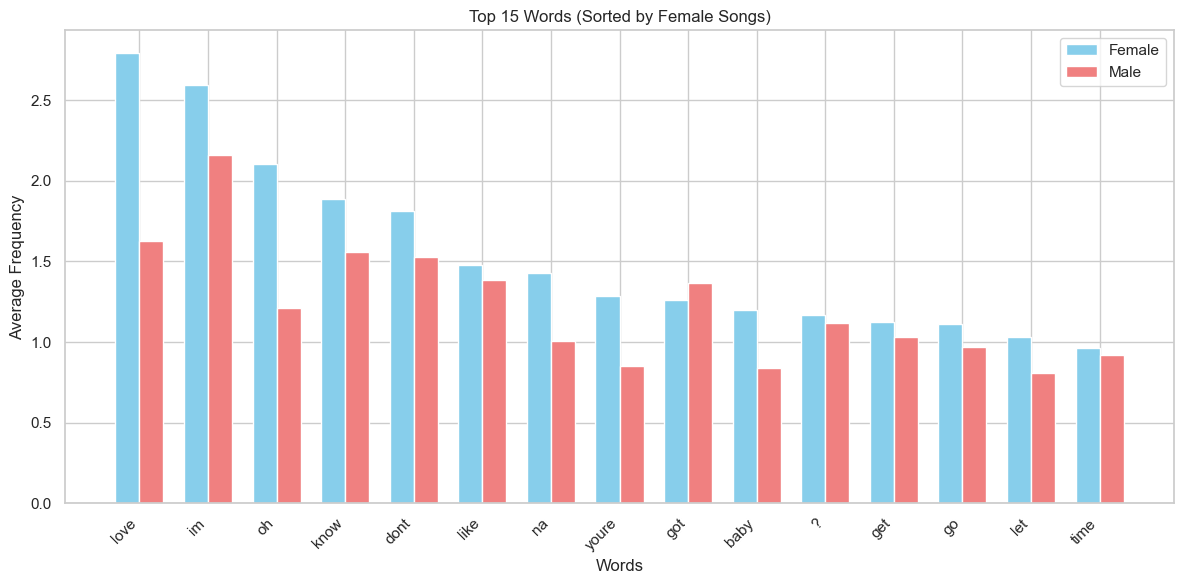

In [73]:
# Female table
top_words = word_df_sorted_female.head(15)['word'].tolist()

# Filter top words
plot_df_female = word_df[word_df['word'].isin(top_words)]
plot_df_female = plot_df_female.set_index('word').loc[top_words].reset_index()  # <-- added to force correct order

# Set up the bar chart
x = np.arange(len(plot_df_female))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, plot_df_female['avg_female'], width, label='Female', color='skyblue')
rects2 = ax.bar(x + width/2, plot_df_female['avg_male'], width, label='Male', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Words')
ax.set_ylabel('Average Frequency')
ax.set_title('Top 15 Words (Sorted by Female Songs)')
ax.set_xticks(x)
ax.set_xticklabels(plot_df_female['word'], rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.show()


In [69]:
word_df_sorted_male = word_df.sort_values(by='avg_male', ascending=False)

word_df_sorted_male.head(15)

,word,avg_female,avg_male
19275,im,2.592829,2.163473
39655,love,2.794245,1.628927
33799,know,1.885590,1.559575
2992,dont,1.810231,1.530830
31579,like,1.479562,1.387759
32384,got,1.261932,1.368009
32182,oh,2.102992,1.213075
21865,?,1.168760,1.118955
22262,get,1.122859,1.028940
19098,na,1.425668,1.007300


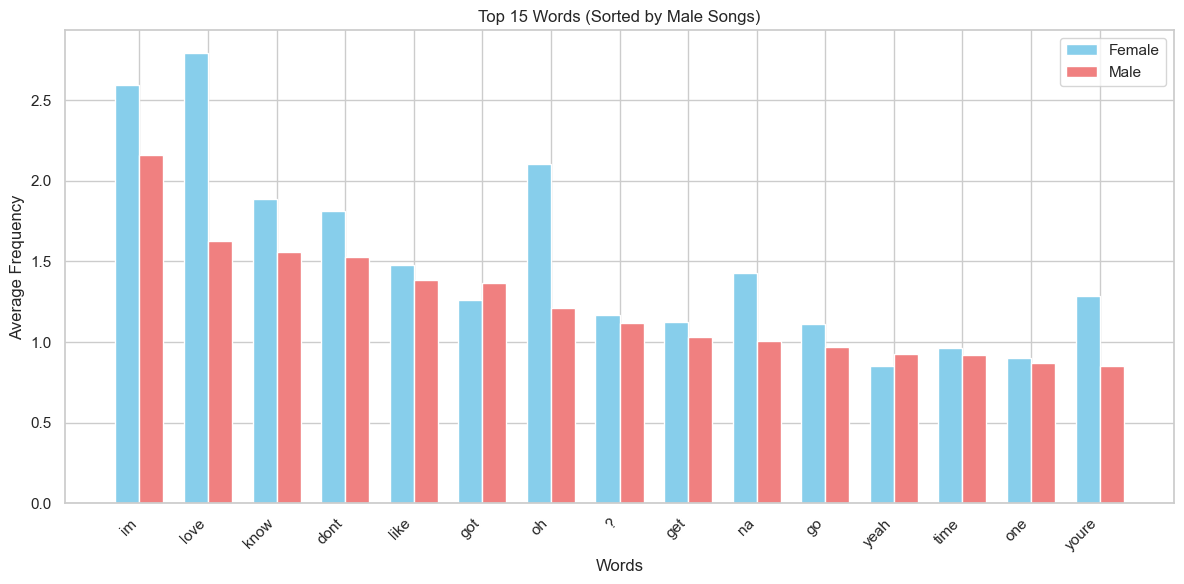

In [71]:
top_words = word_df_sorted_male.head(15)['word'].tolist()

plot_df_male = word_df[word_df['word'].isin(top_words)]
plot_df_male = plot_df_male.set_index('word').loc[top_words].reset_index()

x = np.arange(len(plot_df_male))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, plot_df_male['avg_female'], width, label='Female', color='skyblue')
rects2 = ax.bar(x + width/2, plot_df_male['avg_male'], width, label='Male', color='lightcoral')

ax.set_xlabel('Words')
ax.set_ylabel('Average Frequency')
ax.set_title('Top 15 Words (Sorted by Male Songs)')
ax.set_xticks(x)
ax.set_xticklabels(plot_df_male['word'], rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.show()


## Average Length

In [74]:
# Calculate average length of lyrics for female songs
avg_length_female = df2[df2['GENDER'] == 'female']['lemmatized_lyrics'].apply(len).mean()

# Calculate average length of lyrics for male songs
avg_length_male = df2[df2['GENDER'] == 'male']['lemmatized_lyrics'].apply(len).mean()

# Print the results
print(f"Average length of female lyrics: {avg_length_female}")
print(f"Average length of male lyrics: {avg_length_male}")


Average length of female lyrics: 134.64740808403747
Average length of male lyrics: 131.9617390170773


## Word Cloud

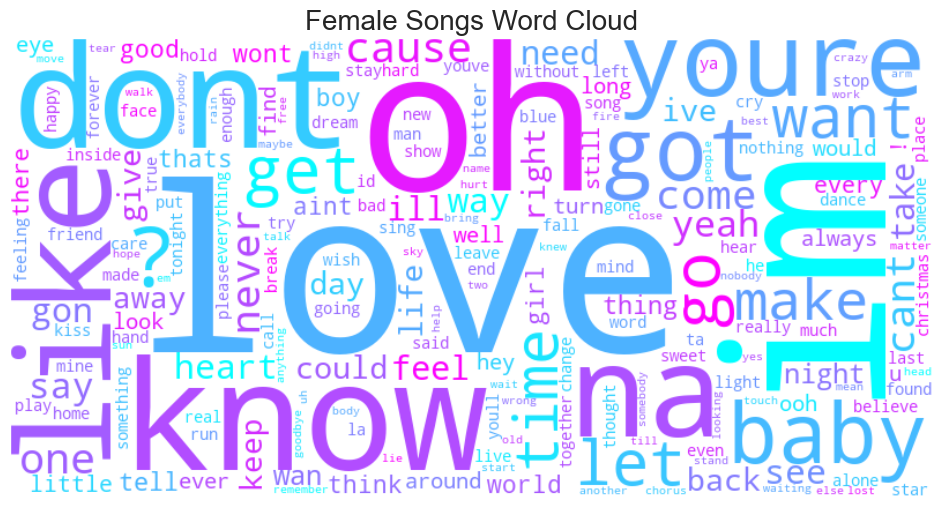

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get all lyrics for females (or you could do males too)
female_lyrics = df2[df2['GENDER'] == 'female']['lemmatized_lyrics']

# Count total word frequencies
from collections import Counter
word_counts_female = Counter()

for lyrics in female_lyrics:
    word_counts_female.update(lyrics)

# Generate the word cloud
wordcloud_female = WordCloud(width=800, height=400, background_color='white', colormap='cool').generate_from_frequencies(word_counts_female)

# Plot it
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_female, interpolation='bilinear')
plt.axis('off')
plt.title('Female Songs Word Cloud', fontsize=20)
plt.show()


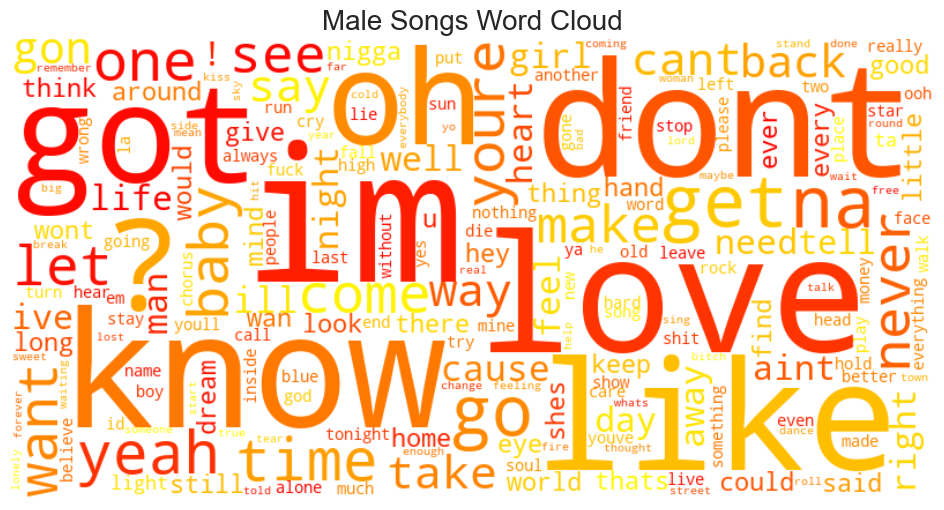

In [76]:
# For male
male_lyrics = df2[df2['GENDER'] == 'male']['lemmatized_lyrics']
word_counts_male = Counter()
for lyrics in male_lyrics:
    word_counts_male.update(lyrics)

wordcloud_male = WordCloud(width=800, height=400, background_color='white', colormap='autumn').generate_from_frequencies(word_counts_male)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_male, interpolation='bilinear')
plt.axis('off')
plt.title('Male Songs Word Cloud', fontsize=20)
plt.show()
